In [153]:
import pandas as pd

In [154]:
df = pd.read_csv(r"/Users/aslinkurt/Documents/6410-Social Media Analytics Txt Mng/Homeworks/HW2/100 Sales Records.csv")

In [155]:
print(df.columns)

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


In [156]:
text_data = df[['Item Type', 'Order Priority']].copy()

In [157]:
text_data['combined'] = text_data['Item Type'] + ' ' + text_data['Order Priority']

In [158]:
print(corpus)

['Baby Food H', 'Cereal C', 'Office Supplies L', 'Fruits C', 'Office Supplies L', 'Baby Food C', 'Household M', 'Vegetables H', 'Personal Care M', 'Cereal H', 'Vegetables H', 'Clothes H', 'Clothes L', 'Household H', 'Personal Care C', 'Clothes M', 'Cosmetics M', 'Beverages C', 'Household L', 'Meat L', 'Baby Food L', 'Baby Food H', 'Snacks L', 'Fruits H', 'Personal Care L', 'Cosmetics H', 'Fruits M', 'Fruits L', 'Beverages C', 'Household L', 'Cosmetics M', 'Personal Care C', 'Office Supplies C', 'Household H', 'Snacks M', 'Personal Care L', 'Fruits L', 'Meat M', 'Office Supplies L', 'Office Supplies M', 'Personal Care H', 'Cosmetics M', 'Cereal H', 'Vegetables H', 'Clothes H', 'Cereal H', 'Cosmetics C', 'Personal Care M', 'Clothes C', 'Office Supplies C', 'Clothes C', 'Fruits L', 'Cereal M', 'Office Supplies M', 'Fruits H', 'Clothes C', 'Clothes C', 'Cosmetics H', 'Household L', 'Cosmetics H', 'Cereal H', 'Baby Food L', 'Office Supplies M', 'Clothes H', 'Cosmetics H', 'Cosmetics H', 'Pe

In [159]:
import re

# Step 1: Convert to lowercase
corpus_lower = [doc.lower() for doc in corpus]

# Step 2: Remove punctuation and special characters using regex
corpus_cleaned = [re.sub(r'[^\w\s]', '', doc) for doc in corpus_lower]

# Step 3: Strip leading/trailing whitespace
normalized_corpus = [doc.strip() for doc in corpus_cleaned]

# Optional: Print a few examples to check
for i in range(5):
    print(normalized_corpus[i])


baby food h
cereal c
office supplies l
fruits c
office supplies l


In [160]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

# Load English tokenizer and lemmatizer
nlp = spacy.load("en_core_web_sm")

# Load stopwords
#nltk.download('punkt')
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Processed corpus
processed_corpus = []

for doc in normalized_corpus:
    # Tokenize
    tokens = word_tokenize(doc)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    doc_nlp = nlp(" ".join(tokens))
    lemmas = [token.lemma_ for token in doc_nlp]
    
    # Recombine
    processed_corpus.append(" ".join(lemmas))

# Show a few examples
for i in range(5):
    print(processed_corpus[i])


baby food h
cereal c
office supply l
fruit c
office supply l


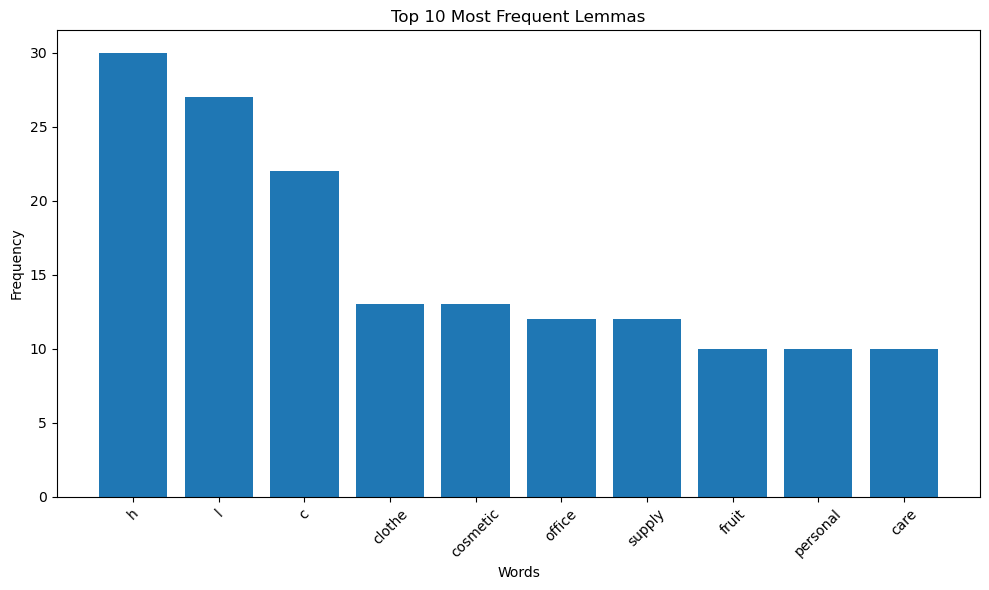

In [161]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all words into a single list
all_words = " ".join(processed_corpus).split()

# Count word frequencies
word_freq = Counter(all_words)

# Get the 10 most common
most_common = word_freq.most_common(10)
words, freqs = zip(*most_common)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.title("Top 10 Most Frequent Lemmas")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


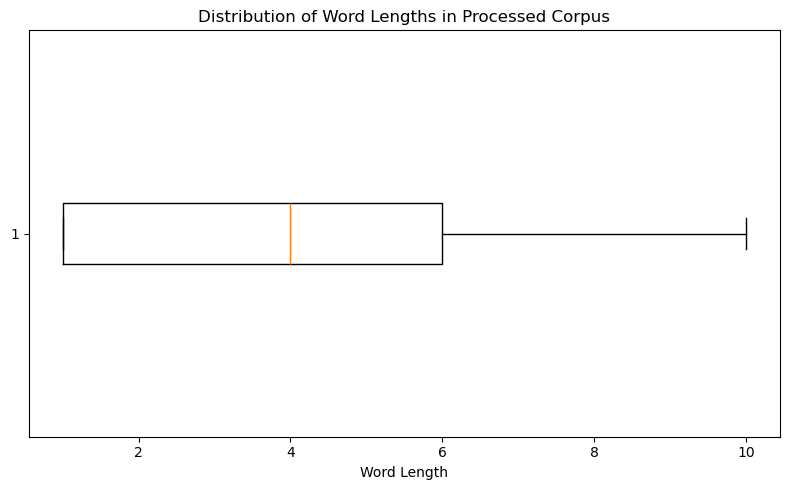

In [162]:
import matplotlib.pyplot as plt

# Get all words from the processed corpus
all_words = " ".join(processed_corpus).split()

# Compute word lengths
word_lengths = [len(word) for word in all_words]

# Plot boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(word_lengths, vert=False)
plt.title("Distribution of Word Lengths in Processed Corpus")
plt.xlabel("Word Length")
plt.tight_layout()
plt.show()


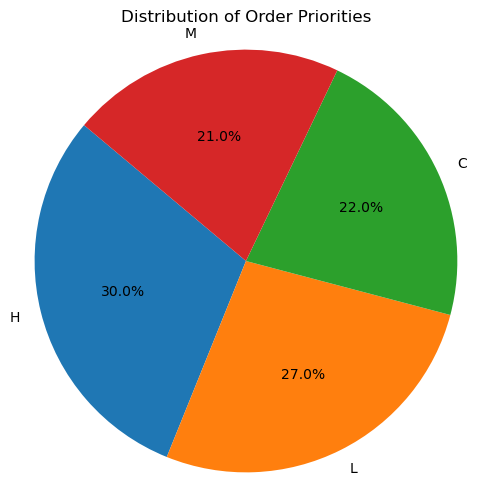

In [163]:
# Pie chart of order priorities
order_counts = df['Order Priority'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Order Priorities")
plt.axis('equal')  # Equal aspect ratio ensures pie is round
plt.show()


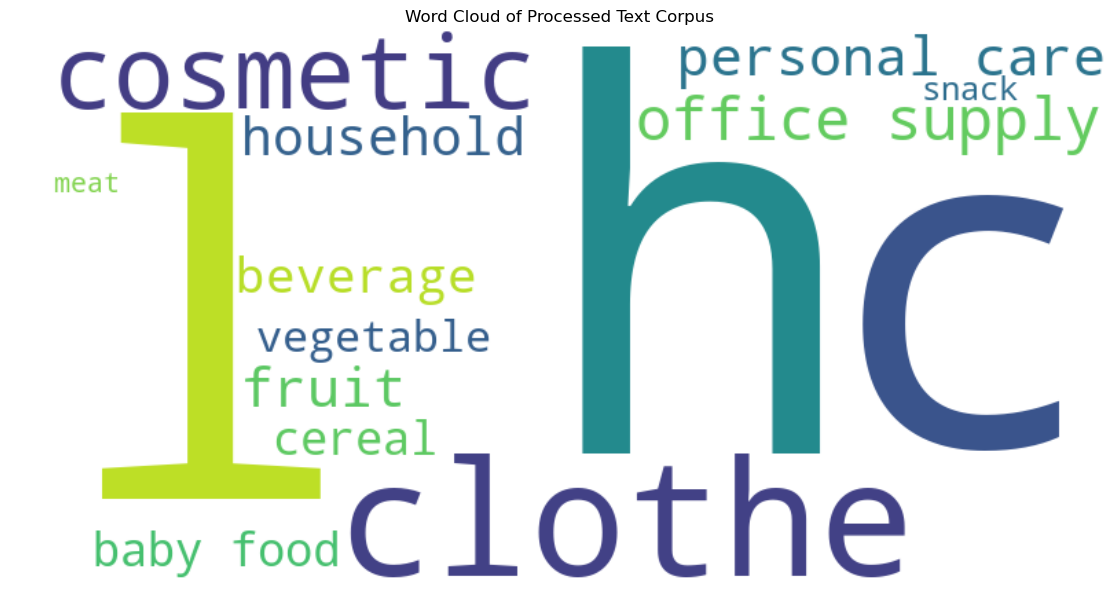

In [164]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words into one string
text_for_wordcloud = " ".join(processed_corpus)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Processed Text Corpus")
plt.tight_layout()
plt.show()
